In [1]:
from transpile_benchy.metrics.gate_counts import DepthMetric, TotalMetric, TotalSwaps
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from mirror_gates.utilities import SubsMetric
from mirror_gates.logging import transpile_benchy_logger

In [2]:
N = 4
coupling_map = CouplingMap.from_line(N)
# coupling_map = CouplingMap.from_heavy_hex(5)

In [3]:
from transpile_benchy.library import CircuitLibrary

# library = CircuitLibrary.from_txt("../../circuits/medium_circuits.txt")
library = CircuitLibrary.from_txt("../../circuits/debug.txt")

In [4]:
# XXX set consolidate to False
# this is allowed only because my pass manager will preserve consolidation
# see post_stage, I call fastconsolidate manually
metrics = [
    DepthMetric(consolidate=False),
    TotalMetric(consolidate=False),
    TotalSwaps(consolidate=False),
    SubsMetric(),
]

transpilers = [
    # QiskitLevel3(coupling_map, cx_basis=True),
    # SabreMS(coupling_map, cx_basis=True, parallel=0),
    QiskitLevel3(coupling_map),
    SabreMS(coupling_map, logger=transpile_benchy_logger),
]

In [7]:
from transpile_benchy.benchmark import Benchmark

benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=1,
)

benchmark.run()
# print(benchmark)

INFO:transpile_benchy:Running benchmarks for circuits...
Circuits from library:   0%|          | 0/1 [00:00<?, ?it/s]INFO:transpile_benchy:Running benchmark for circuit qft_n4
DEBUG:transpile_benchy:Running transpiler Qiskit-$\sqrt{\texttt{iSWAP}}$ on circuit qft_n4


Loading qft_n4 from QASMBench


DEBUG:transpile_benchy:Running transpiler SABREMS-$\sqrt{\texttt{iSWAP}}$ on circuit qft_n4
Circuits from library: 100%|██████████| 1/1 [01:24<00:00, 84.09s/it]


In [6]:
print(benchmark)


Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$

  Metric: accepted_subs
  Circuit: qft_n4                                   Mean result: 0.000                          Trials: [0]

  Metric: monodromy_depth
  Circuit: qft_n4                                   Mean result: 7.500                          Trials: [7.5]

  Metric: monodromy_total
  Circuit: qft_n4                                   Mean result: 8.500                          Trials: [8.5]

  Metric: total_runtime
  Circuit: qft_n4                                   Mean result: 0.045                          Trials: [0.04518532752990723]

  Metric: total_swaps
  Circuit: qft_n4                                   Mean result: 0.000                          Trials: [0]

Transpiler: SABREMS-$\sqrt{\texttt{iSWAP}}$

  Metric: accepted_subs
  Circuit: qft_n4                                   Mean result: 0.800                          Trials: [0.8]

  Metric: monodromy_depth
  Circuit: qft_n4                                   Mean res

In [ ]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'monodromy_depth': {'average_change': -27.7777777777778,
  'best_circuit': 'qft_n4',
  'worst_circuit': 'qft_n4'},
 'monodromy_total': {'average_change': -11.111111111111148,
  'best_circuit': 'qft_n4',
  'worst_circuit': 'qft_n4'},
 'total_swaps': {'average_change': 0.0,
  'best_circuit': 'qft_n4',
  'worst_circuit': 'qft_n4'},
 'accepted_subs': {'average_change': inf,
  'best_circuit': 'qft_n4',
  'worst_circuit': 'qft_n4'},
 'total_runtime': {'average_change': 31472.50815178041,
  'best_circuit': 'qft_n4',
  'worst_circuit': 'qft_n4'}}

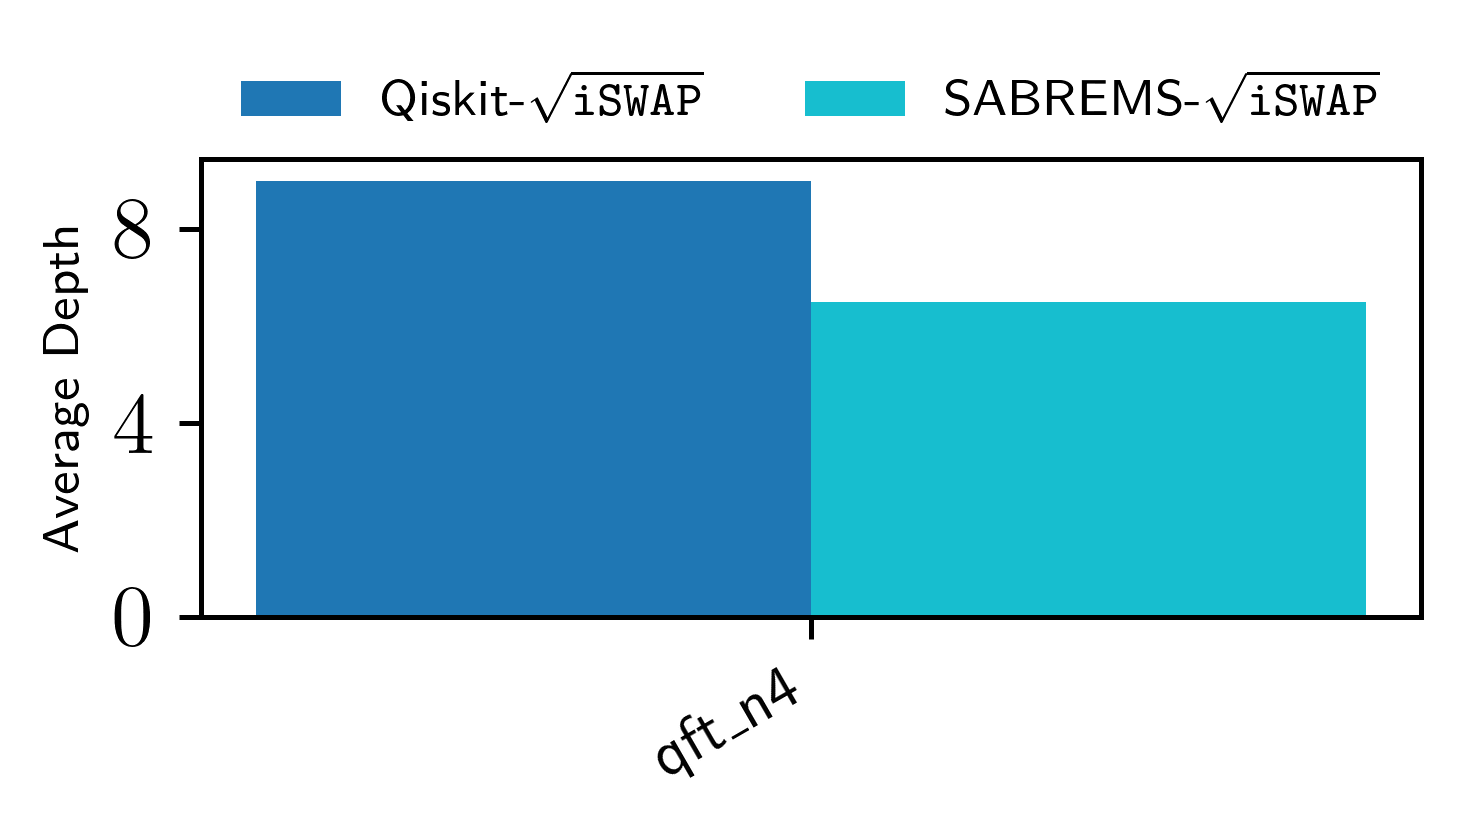

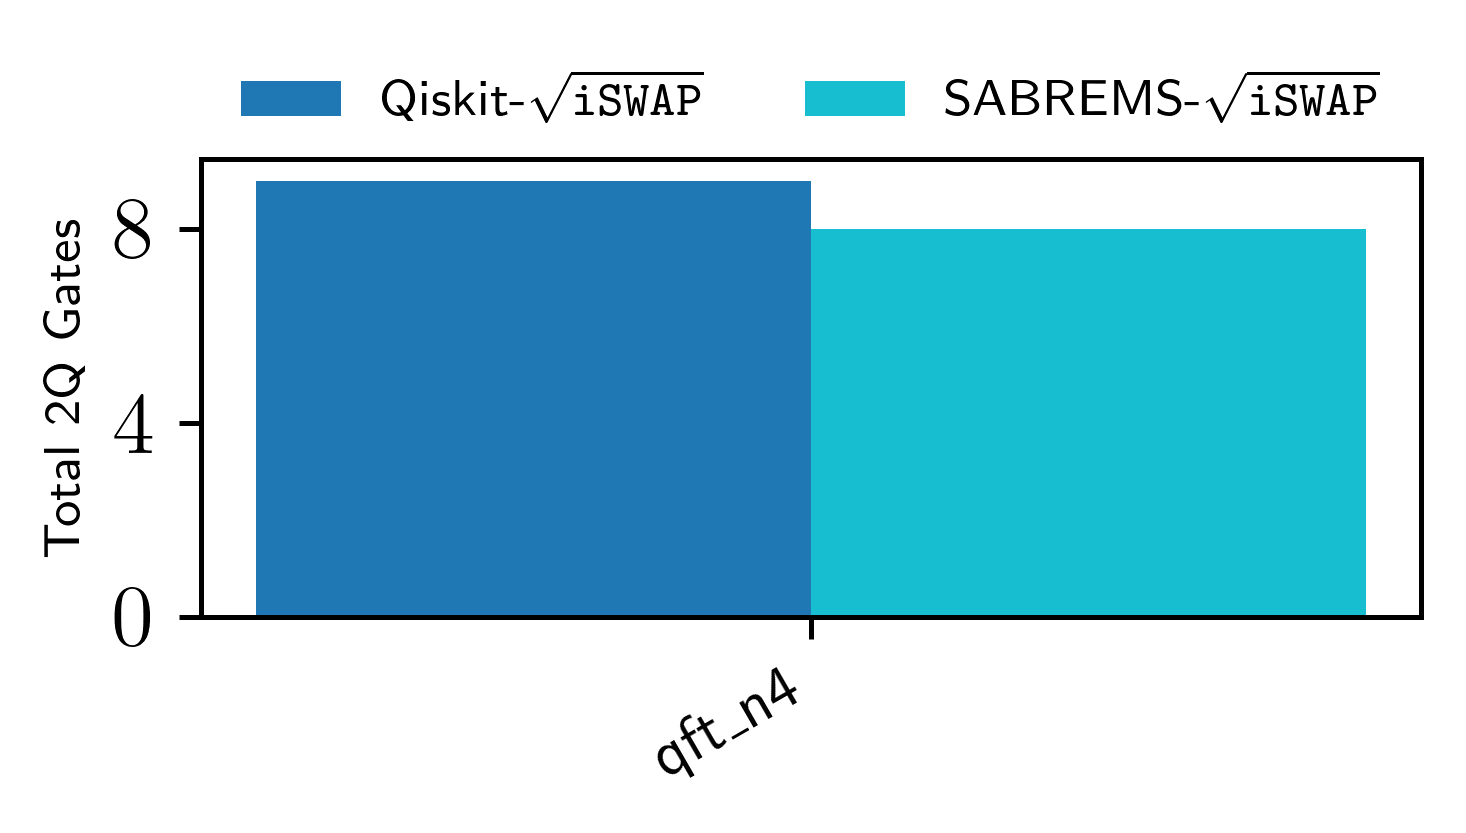

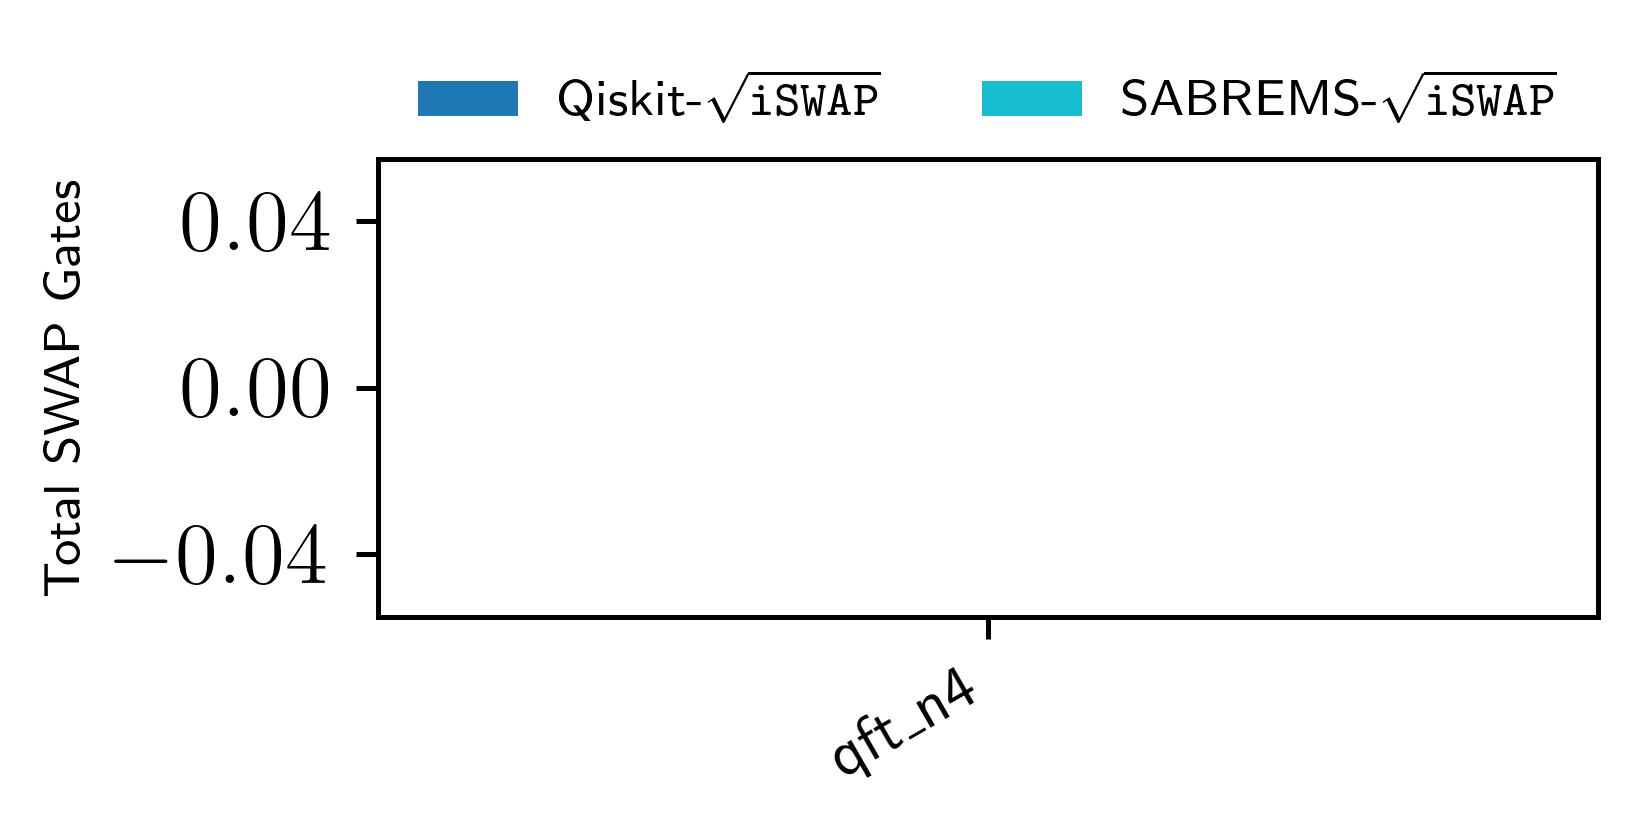

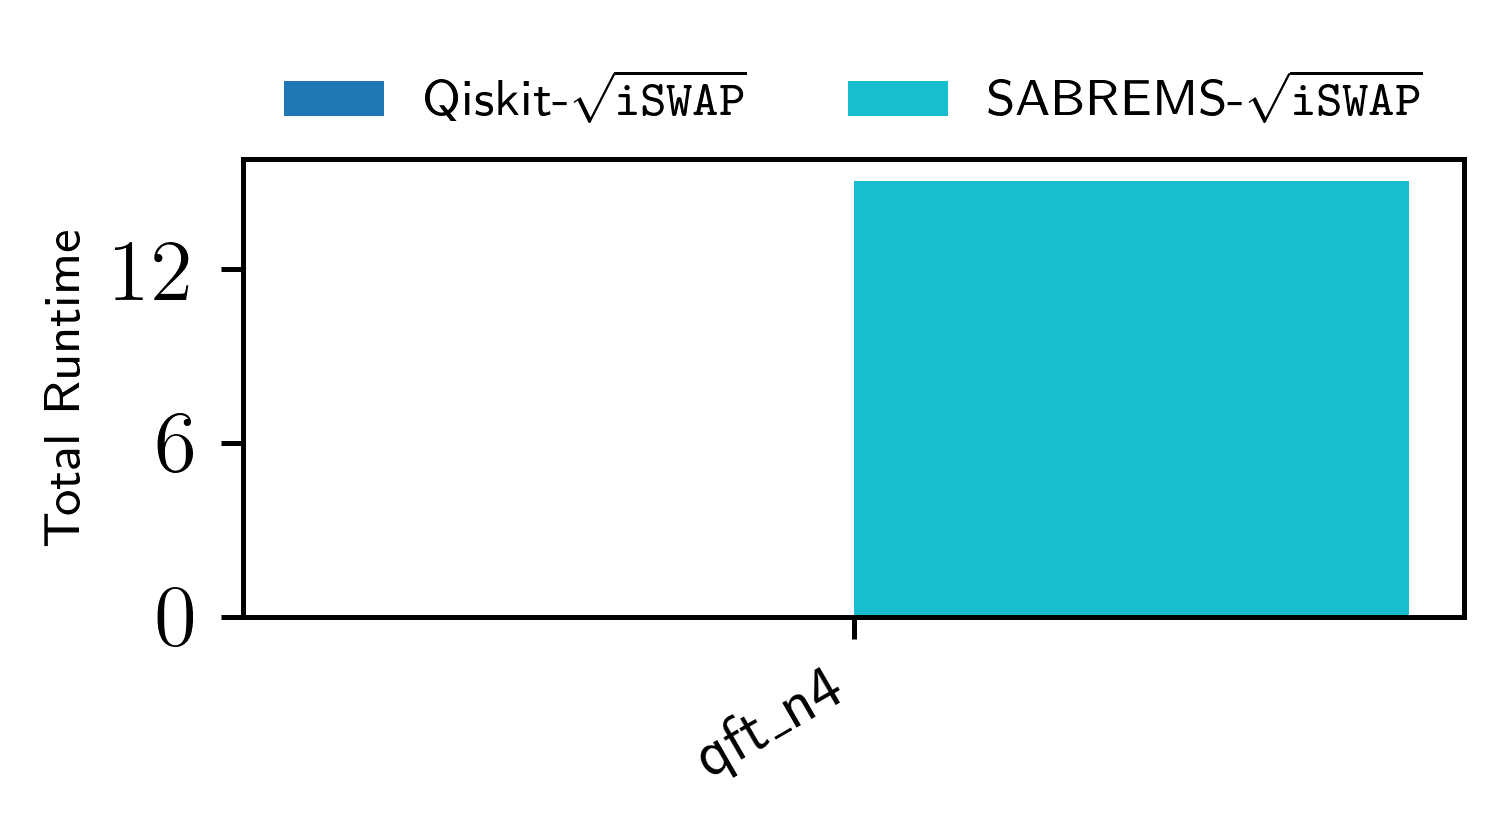

In [ ]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="hex")